In [301]:
import tensorflow as tf
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Keras imports
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Dropout, Flatten, MaxPooling2D, Activation, LeakyReLU
from keras.optimizers import RMSprop, Adam

In [302]:
# starting work on mnist branch.splitting the data into train/test. x = images, y = class 0-9;
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


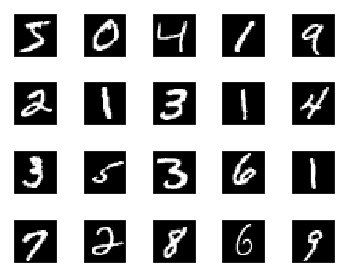

mnist shape
(60000, 28, 28)
mnist shape: first dim
60000
mnist shape: second dim
28


In [303]:
# display a sample of the mnist data
plt.figure(figsize=(5, 4))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

print('mnist shape')
print(x_train.shape)
print('mnist shape: first dim')
print(x_train.shape[0])
print('mnist shape: second dim')
print(x_train.shape[1])

In [304]:
# reshaping the mnist data -> [# of images, img_height, img_width, img_depth (=1 b/c 1 bit -> 2 colors (black or white))]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

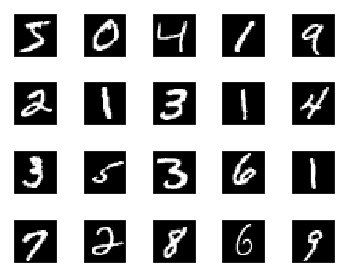

In [305]:
# check that reshaping worked

plt.figure(figsize=(5, 4))
for i in range(20):
    plt.subplot(4, 5, i+1)
    img = x_train[i][0:28]
    img = img.reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [306]:
# converting type to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the rgb codes
x_train = x_train/255
x_test = x_test/255

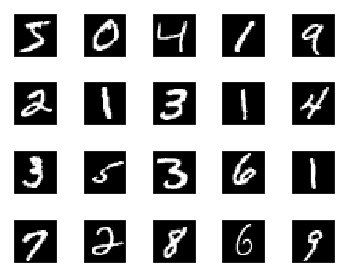

In [307]:
# check normalized images still work

plt.figure(figsize=(5, 4))
for i in range(20):
    plt.subplot(4, 5, i+1)
    img = x_train[i][0:28]
    img = img.reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [382]:
# Input noise to generator, -1 to 1 b/c of tanh
def sample_Z(batch_size, m, n):
    return np.random.uniform(-1, 1, size=[batch_size, m, n, 1])
    #return np.random.uniform(-1, 1, size=[m,n])
a = sample_Z(10, 1, 1)
print(a.shape)

(10, 1, 1, 1)


In [367]:
# Generator function
def generator(Z, reuse=False):
    # create a sequential model
    model = Sequential()
    
    # adding layers - 2 leaky relu and 1 tanh
    model.add(Dense(128, input_shape=(256,28,28,1)))
    model.add(keras.layers.LeakyReLU(alpha=0.1))
    model.add(Dense(128))
    model.add(keras.layers.LeakyReLU(alpha=0.1))
    model.add(Dense(784))
    model.add(Activation('tanh'))
    
    # model name
    model.name='generator'
    
    # print the structure of the model
    print(model.summary())
    
    # output of the model
    return model

In [368]:
Z = sample_Z(256,28,28)
G = generator(Z)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_184 (Dense)            (None, 256, 28, 28, 128)  256       
_________________________________________________________________
leaky_re_lu_123 (LeakyReLU)  (None, 256, 28, 28, 128)  0         
_________________________________________________________________
dense_185 (Dense)            (None, 256, 28, 28, 128)  16512     
_________________________________________________________________
leaky_re_lu_124 (LeakyReLU)  (None, 256, 28, 28, 128)  0         
_________________________________________________________________
dense_186 (Dense)            (None, 256, 28, 28, 784)  101136    
_________________________________________________________________
activation_54 (Activation)   (None, 256, 28, 28, 784)  0         
Total params: 117,904
Trainable params: 117,904
Non-trainable params: 0
_________________________________________________________________
None

In [369]:
def discriminator(X,reuse=False):
    
    # create a sequential model
    model = Sequential()
    
    # adding layers - 2 leaky relu and 1 tanh
    model.add(Dense(128, input_shape=(784,)))
    model.add(keras.layers.LeakyReLU(alpha=0.1))
    model.add(Dense(128))
    model.add(keras.layers.LeakyReLU(alpha=0.1))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    # model name 
    model.name='discriminator'
    
    # print the structure of the model
    print(model.summary())
    
    # output of the model
    return model
    

In [370]:
D = discriminator(Z[0].flatten())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_187 (Dense)            (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_125 (LeakyReLU)  (None, 128)               0         
_________________________________________________________________
dense_188 (Dense)            (None, 128)               16512     
_________________________________________________________________
leaky_re_lu_126 (LeakyReLU)  (None, 128)               0         
_________________________________________________________________
dense_189 (Dense)            (None, 1)                 129       
_________________________________________________________________
activation_55 (Activation)   (None, 1)                 0         
Total params: 117,121
Trainable params: 117,121
Non-trainable params: 0
_________________________________________________________________
None

In [371]:
# creating placeholder variables for the noise, and data taken from training set
X = tf.placeholder(tf.float32,[None,28,28])
Z = tf.placeholder(tf.float32,[None,28,28])

In [372]:
G_sample = generator(Z)
D_sample = discriminator(X)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_190 (Dense)            (None, 256, 28, 28, 128)  256       
_________________________________________________________________
leaky_re_lu_127 (LeakyReLU)  (None, 256, 28, 28, 128)  0         
_________________________________________________________________
dense_191 (Dense)            (None, 256, 28, 28, 128)  16512     
_________________________________________________________________
leaky_re_lu_128 (LeakyReLU)  (None, 256, 28, 28, 128)  0         
_________________________________________________________________
dense_192 (Dense)            (None, 256, 28, 28, 784)  101136    
_________________________________________________________________
activation_56 (Activation)   (None, 256, 28, 28, 784)  0         
Total params: 117,904
Trainable params: 117,904
Non-trainable params: 0
_________________________________________________________________
None

In [373]:
# creating gan model using Keras (sharing the same weights)
gan = Sequential([
    G_sample,
    D_sample
])



In [374]:
# compiling
D_sample.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy')
G_sample.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy')

In [375]:
# preprocessing function for the mnist data 
def preprocess(x):
    x = x.reshape(-1,784)
    x = np.float64(x)
    x = (x / 255 - 0.5) * 2
    x = np.clip(x, -1, 1)
    return x

In [376]:
x_train_processed = preprocess(x_train)
x_test_processed = preprocess(x_test)

In [377]:
# deprocessing function for viewing images
def deprocess(x):
    x = (x / 2 + 1) * 255
    x = np.clip(x, 0, 255)
    x = np.uint8(x)
    x = x.reshape(28, 28)
    return x

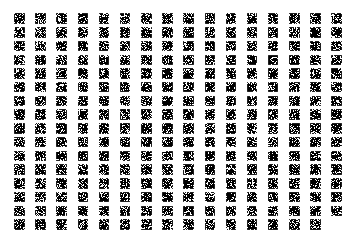

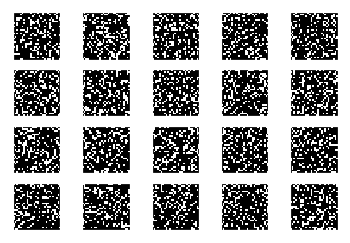

In [378]:
# test deprocessing
test = sample_Z(256, 28, 28)
test = preprocess(test)

plt.figure()
for i in range(len(test)-1):
    img = deprocess(test[i])
    plt.subplot(16, 16, i+1)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

plt.figure()
for i in range(20):
    img = deprocess(test[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()


In [379]:
def make_labels(size):
    return np.ones([size, 1]), np.zeros([size, 1])

y_train_real, y_train_fake = make_labels(batch_size)
y_eval_real,  y_eval_fake  = make_labels(eval_size)

In [ ]:
r_logits, r_rep = D_sample(X)
f_logits, g_rep = D_Sample(G_sample,reuse=True)






disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))

gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")

gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars) # G Train step
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars) # D Train step

sess = tf.Session(config=config)
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = 256
nd_steps = 10
ng_steps = 10

x_plot = sample_data(n=batch_size)

f = open('loss_logs.csv','w')
f.write('Iteration,Discriminator Loss,Generator Loss\n')

In [246]:
# for i in range(10001):
#     X_batch = sample_data(n=batch_size)
    
#     # 28 x 28 pixel images
#     Z_batch = sample_Z(batch_size, 28, 28)

#     for _ in range(nd_steps):
#         _, dloss = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
#     rrep_dstep, grep_dstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

#     for _ in range(ng_steps):
#         _, gloss = sess.run([gen_step, gen_loss], feed_dict={Z: Z_batch})

#     rrep_gstep, grep_gstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

#     print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f" % (i,dloss,gloss))
#     if i%10 == 0:
#         f.write("%d,%f,%f\n"%(i,dloss,gloss))

#     if i%1000 == 0:
#         # Iterations gif
#         plt.figure()
#         g_plot = sess.run(G_sample, feed_dict={Z: Z_batch})
#         xax = plt.scatter(x_plot[:,0], x_plot[:,1])
#         gax = plt.scatter(g_plot[:,0],g_plot[:,1])
#         plt.xlim(-60, 60)
#         plt.ylim(-50, 2600)
#         plt.legend((xax,gax), ("Real Data","Generated Data"))
#         plt.title('Samples at Iteration %d'%i)
#         plt.tight_layout()
#         plt.savefig('../plots/iterations/iteration_%d.png'%i)
#         plt.close()

#         # Feature transform gif
#         plt.figure()
#         rrd = plt.scatter(rrep_dstep[:,0], rrep_dstep[:,1], alpha=0.5)
#         rrg = plt.scatter(rrep_gstep[:,0], rrep_gstep[:,1], alpha=0.5)
#         grd = plt.scatter(grep_dstep[:,0], grep_dstep[:,1], alpha=0.5)
#         grg = plt.scatter(grep_gstep[:,0], grep_gstep[:,1], alpha=0.5)
#         plt.xlim(-200, 200)
#         plt.ylim(-40, 40)
#         plt.legend((rrd, rrg, grd, grg), ("Real Data Before G step","Real Data After G step",
#                                "Generated Data Before G step","Generated Data After G step"))
#         plt.title('Transformed Features at Iteration %d'%i)
#         plt.tight_layout()
#         plt.savefig('../plots/features/feature_transform_%d.png'%i)
#         plt.close()

#         # Feature transform of centroids gif
#         plt.figure()
#         rrdc = plt.scatter(np.mean(rrep_dstep[:,0]), np.mean(rrep_dstep[:,1]),s=100, alpha=0.5)
#         rrgc = plt.scatter(np.mean(rrep_gstep[:,0]), np.mean(rrep_gstep[:,1]),s=100, alpha=0.5)
#         grdc = plt.scatter(np.mean(grep_dstep[:,0]), np.mean(grep_dstep[:,1]),s=100, alpha=0.5)
#         grgc = plt.scatter(np.mean(grep_gstep[:,0]), np.mean(grep_gstep[:,1]),s=100, alpha=0.5)
#         plt.xlim(-50, 50)
#         plt.ylim(-50, 50)
#         plt.legend((rrdc, rrgc, grdc, grgc), ("Real Data Before G step","Real Data After G step",
#                                "Generated Data Before G step","Generated Data After G step"))

#         plt.title('Centroid of Transformed Features at Iteration %d'%i)
#         plt.tight_layout()
#         plt.savefig('../plots/features/feature_transform_centroid_%d.png'%i)
#         plt.close()

# f.close()